# Quickstart: NOAA GEFS forecast, 35 day - dynamical.org zarr
A brief introduction to the NOAA GEFS forecast dataset transformed into an analysis-ready, cloud-optimized format by dynamical.org.

Dataset documentation: https://dynamical.org/catalog/noaa-gefs-forecast-35-day/


In [ ]:
# Install dependencies required for this example.
# If you're not using pip to install depdencies (for example, you're using conda or uv),
# skip this cell and and install using the package manager of your choice.
# Restart the notebook after installing dependencies.
%pip install "xarray[complete]>=2025.1.2" "zarr>=3.0.4" requests aiohttp

In [2]:
import xarray as xr

ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr?email=optional@email.com", decode_timedelta=True, chunks=None)
ds

<xarray.Dataset> Size: 795TB
Dimensions:                                     (init_time: 1624,
                                                 ensemble_member: 31,
                                                 lead_time: 181, latitude: 721,
                                                 longitude: 1440)
Coordinates:
  * ensemble_member                             (ensemble_member) uint16 62B ...
    expected_forecast_length                    (init_time) timedelta64[ns] 13kB ...
    ingested_forecast_length                    (init_time, ensemble_member) timedelta64[ns] 403kB ...
  * init_time                                   (init_time) datetime64[ns] 13kB ...
  * latitude                                    (latitude) float64 6kB 90.0 ....
  * lead_time                                   (lead_time) timedelta64[ns] 1kB ...
  * longitude                                   (longitude) float64 12kB -180...
    spatial_ref                                 int64 8B ...
    valid_time                                  (init_time, lead_time) datetime64[ns] 2MB ...
Data variables: (12/21)
    categorical_freezing_rain_surface           (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    categorical_ice_pellets_surface             (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    categorical_rain_surface                    (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    categorical_snow_surface                    (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    downward_long_wave_radiation_flux_surface   (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    downward_short_wave_radiation_flux_surface  (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    ...                                          ...
    temperature_2m                              (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    total_cloud_cover_atmosphere                (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    wind_u_100m                                 (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    wind_u_10m                                  (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    wind_v_100m                                 (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
    wind_v_10m                                  (init_time, ensemble_member, lead_time, latitude, longitude) float32 38TB ...
Attributes:
    dataset_id:           noaa-gefs-forecast-35-day
    dataset_version:      0.2.0
    name:                 NOAA GEFS forecast, 35 day
    description:          Weather forecasts from the Global Ensemble Forecast...
    attribution:          NOAA NWS NCEP GEFS data processed by dynamical.org ...
    spatial_domain:       Global
    spatial_resolution:   0-240 hours: 0.25 degrees (~20km), 243-840 hours: 0...
    time_domain:          Forecasts initialized 2020-10-01 00:00:00 UTC to Pr...
    time_resolution:      Forecasts initialized every 24 hours.
    forecast_domain:      Forecast lead time 0-840 hours (0-35 days) ahead
    forecast_resolution:  Forecast step 0-240 hours: 3 hourly, 243-840 hours:...

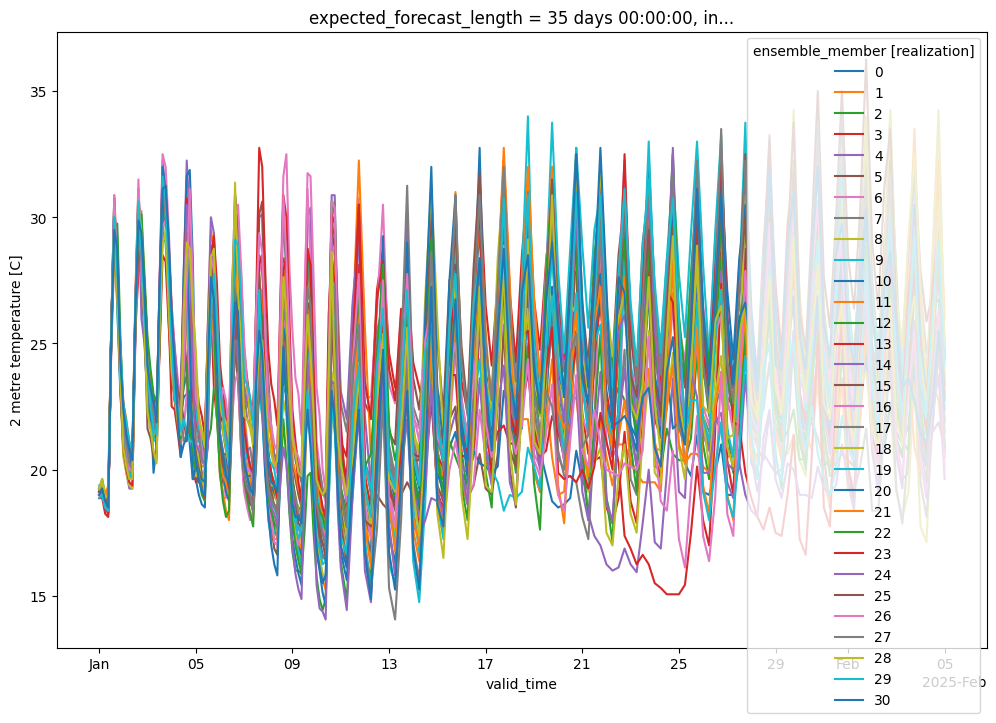

In [3]:
# Plot the ensemble traces of the 2025-01-01 forecast at a point on the earth
plot_ds = ds.sel(init_time="2025-01-01T00", latitude=-23.5, longitude=-46.6, method="nearest")  # São Paulo, Brazil
_ = plot_ds["temperature_2m"].plot(x="valid_time", hue="ensemble_member", figsize=(12, 8))

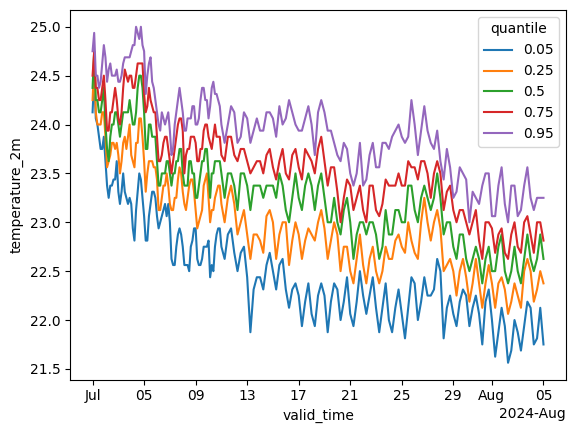

In [4]:
# Plot a summary of the ensemble distribution using quantiles
plot_ds = ds.sel(init_time="2024-07-01T00", latitude=0, longitude=0)
(
    plot_ds["temperature_2m"]
    .quantile([0.05, 0.25, 0.5, 0.75, 0.95], dim="ensemble_member")
    .plot(x="valid_time", hue="quantile")
)

In [5]:
# The following larger area examples run faster using dask which happens by default if you omit chunks=None
ds = xr.open_zarr("https://data.dynamical.org/noaa/gefs/forecast-35-day/latest.zarr?email=optional@email.com", decode_timedelta=True)

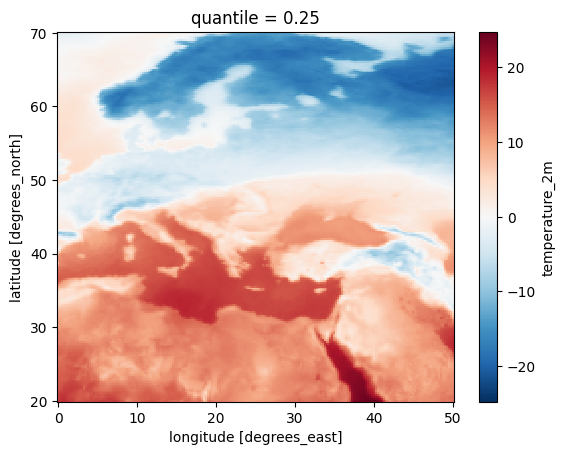

In [6]:
# Calculate a quantile across ensemble members and display the result as a map
(
    ds["temperature_2m"]
    .sel(init_time="2025-01-01T00")
    .sel(lead_time="7d")
    .sel(latitude=slice(70, 20), longitude=slice(0, 50))
    .quantile(0.25, dim="ensemble_member") # 25% chance it gets colder than this
    .plot()
)

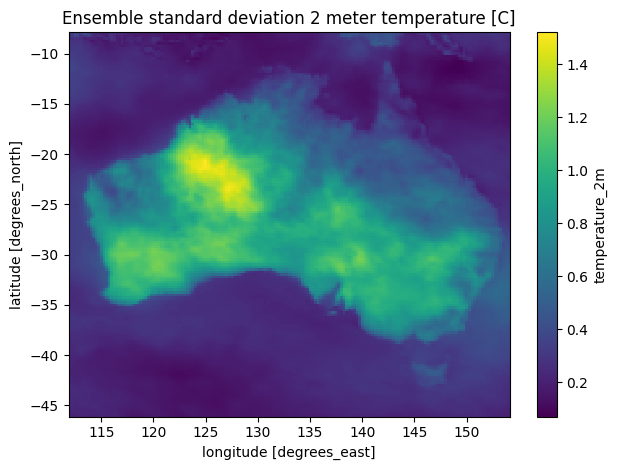

In [7]:
# Highlight areas of uncertainty in temperature forecast over the first 7 days of 2025

import matplotlib.pyplot as plt

plot_ds = (
    ds.sel(init_time="2024-03-01T00")
    .sel(latitude=slice(-8, -46), longitude=slice(112, 154))  # Australia
    .sel(lead_time=slice("0h", "6d")).mean(dim="lead_time")  # Average the first week of the forecast
)

# Standard deviation across ensemble members to highlight regions of forecast uncertainty
plot_ds["temperature_2m"].std(dim="ensemble_member").plot()
plt.title(f"Ensemble standard deviation 2 meter temperature [{ds['temperature_2m'].attrs['units']}]")

plt.tight_layout()